In [1]:
a <- c(1,2,3)
a

[1] 1 2 3

In [2]:
manager <- c(1, 2, 3, 4, 5)
date <- c("10/24/08", "10/28/08", "10/1/08", "10/12/08", "5/1/09")
country <- c("US", "US", "UK", "UK", "UK")
gender <- c("M", "F", "F", "M", "F")
age <- c(32, 45, 25, 39, 99)
q1 <- c(5, 3, 3, 3, 2)
q2 <- c(4, 5, 5, 3, 2)
q3 <- c(5, 2, 5, 4, 1)
q4 <- c(5, 5, 5, NA, 2)
q5 <- c(5, 5, 2, NA, 1)
leadership <- data.frame(manager, date, country, gender, age,
 q1, q2, q3, q4, q5, stringsAsFactors=FALSE)

In [3]:
leadership

  manager     date country gender age q1 q2 q3 q4 q5
1       1 10/24/08      US      M  32  5  4  5  5  5
2       2 10/28/08      US      F  45  3  5  2  5  5
3       3  10/1/08      UK      F  25  3  5  5  5  2
4       4 10/12/08      UK      M  39  3  3  4 NA NA
5       5   5/1/09      UK      F  99  2  2  1  2  1

In [4]:
leadership <- within(leadership,{
 agecat <- NA
 agecat[age > 65] <- "Elder"
 agecat[age >= 35 & age <= 75] <- "Middle Aged"
 agecat[age < 35] <- "Young" })

In [5]:
leadership

  manager     date country gender age q1 q2 q3 q4 q5      agecat
1       1 10/24/08      US      M  32  5  4  5  5  5       Young
2       2 10/28/08      US      F  45  3  5  2  5  5 Middle Aged
3       3  10/1/08      UK      F  25  3  5  5  5  2       Young
4       4 10/12/08      UK      M  39  3  3  4 NA NA Middle Aged
5       5   5/1/09      UK      F  99  2  2  1  2  1       Elder

In [13]:
install.packages("ggplot2", repos="http://watson.nci.nih.gov/cran_mirror/")

Installing package into ‘/home/notebook/R/library’
(as ‘lib’ is unspecified)
also installing the dependency ‘MASS’




The downloaded source packages are in
	‘/tmp/Rtmpe2ZWqz/downloaded_packages’


In [15]:
install.packages('reshape', repos="http://cran.rstudio.com/")

Installing package into ‘/home/notebook/R/library’
(as ‘lib’ is unspecified)



The downloaded source packages are in
	‘/tmp/Rtmpe2ZWqz/downloaded_packages’


In [16]:
library("reshape")
leadership <- rename(leadership,
 c(manager="managerID", date="testDate")
)

In [17]:
leadership$age[leadership$age == 99] <- NA

In [18]:
newdata <- na.omit(leadership)

In [19]:
myformat <- "%m/%d/%y"
leadership$testDate <- as.Date(leadership$testDate, myformat)
leadership

  managerID   testDate country gender age q1 q2 q3 q4 q5      agecat
1         1 2008-10-24      US      M  32  5  4  5  5  5       Young
2         2 2008-10-28      US      F  45  3  5  2  5  5 Middle Aged
3         3 2008-10-01      UK      F  25  3  5  5  5  2       Young
4         4 2008-10-12      UK      M  39  3  3  4 NA NA Middle Aged
5         5 2009-05-01      UK      F  NA  2  2  1  2  1       Elder

In [20]:
attach(leadership)
newdata <-leadership[order(gender, -age),]
newdata
detach(leadership)
newdata

  managerID   testDate country gender age q1 q2 q3 q4 q5      agecat
5         5 2009-05-01      UK      F  NA  2  2  1  2  1       Elder
2         2 2008-10-28      US      F  45  3  5  2  5  5 Middle Aged
3         3 2008-10-01      UK      F  25  3  5  5  5  2       Young
4         4 2008-10-12      UK      M  39  3  3  4 NA NA Middle Aged
1         1 2008-10-24      US      M  32  5  4  5  5  5       Young

  managerID   testDate country gender age q1 q2 q3 q4 q5      agecat
5         5 2009-05-01      UK      F  NA  2  2  1  2  1       Elder
2         2 2008-10-28      US      F  45  3  5  2  5  5 Middle Aged
3         3 2008-10-01      UK      F  25  3  5  5  5  2       Young
4         4 2008-10-12      UK      M  39  3  3  4 NA NA Middle Aged
1         1 2008-10-24      US      M  32  5  4  5  5  5       Young

In [21]:
x <- c(1:8)
scale(x, center=TRUE, scale=TRUE)

           [,1]
[1,] -1.4288690
[2,] -1.0206207
[3,] -0.6123724
[4,] -0.2041241
[5,]  0.2041241
[6,]  0.6123724
[7,]  1.0206207
[8,]  1.4288690
attr(,"scaled:center")
[1] 4.5
attr(,"scaled:scale")
[1] 2.44949

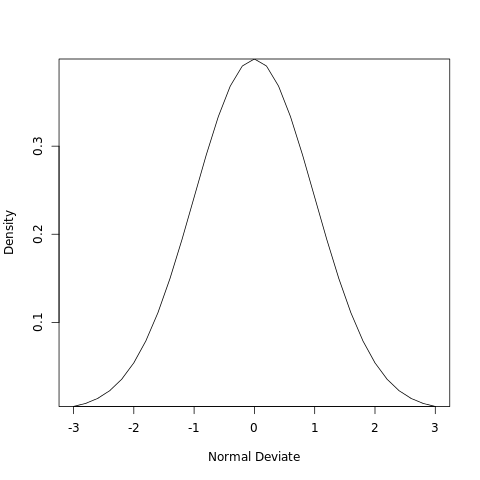

[1] 0.9750021

In [22]:
x <- pretty(c(-3,3), 30)
y <- dnorm(x)
plot(x, y,
 type = "l",
 xlab = "Normal Deviate",
 ylab = "Density",
 yaxs = "i"
)
pnorm(1.96)

In [23]:
library(MASS)
options(digits=3)
set.seed(1234) 
mean <- c(230.7, 146.7, 3.6)
sigma <- matrix(c(15360.8, 6721.2, -47.1, 
                  6721.2, 4700.9, -16.5,
                  -47.1, -16.5, 0.3), nrow=3, ncol=3)
mydata <- mvrnorm(500, mean, sigma) 
mydata <- as.data.frame(mydata)
names(mydata) <- c("y","x1","x2")
dim(mydata) 

head(mydata, n=10)

[1] 500   3

       y    x1   x2
1   98.8  41.3 3.43
2  244.5 205.2 3.80
3  375.7 186.7 2.51
4  -59.2  11.2 4.71
5  313.0 111.0 3.45
6  288.8 185.1 2.72
7  134.8 165.0 4.39
8  171.7  97.4 3.64
9  167.2 101.0 3.50
10 121.1  94.5 4.10

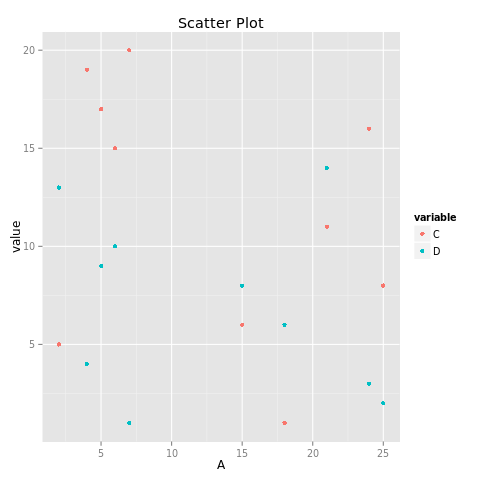

In [24]:
library(ggplot2) 

a <- sample(1:25, 10)
b <- sample(1:50, 10)
c <- sample(1:20, 10)
d <- sample(1:15, 10)
mydf = data.frame(A=a, B=b, C=c, D=d)

ggplot(mydf, aes(x= A, 
                 y = value, color = variable
                )) +     geom_point(aes(y = C, col = "C")) + 
    geom_point(aes(y = D, col = "D")) + 
ggtitle("Scatter Plot")